In [193]:
import numpy as np 
import pandas as pd 
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation/Train.csv
/kaggle/input/customer-segmentation/Test.csv


In [194]:
df = pd.read_csv('/kaggle/input/customer-segmentation/Test.csv')
test = pd.read_csv("/kaggle/input/customer-segmentation/Test.csv")

In [195]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [196]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [197]:
df = df.drop('ID', axis = 1 )

In [198]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [199]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [200]:
df.isnull().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

<AxesSubplot:xlabel='Family_Size', ylabel='Count'>

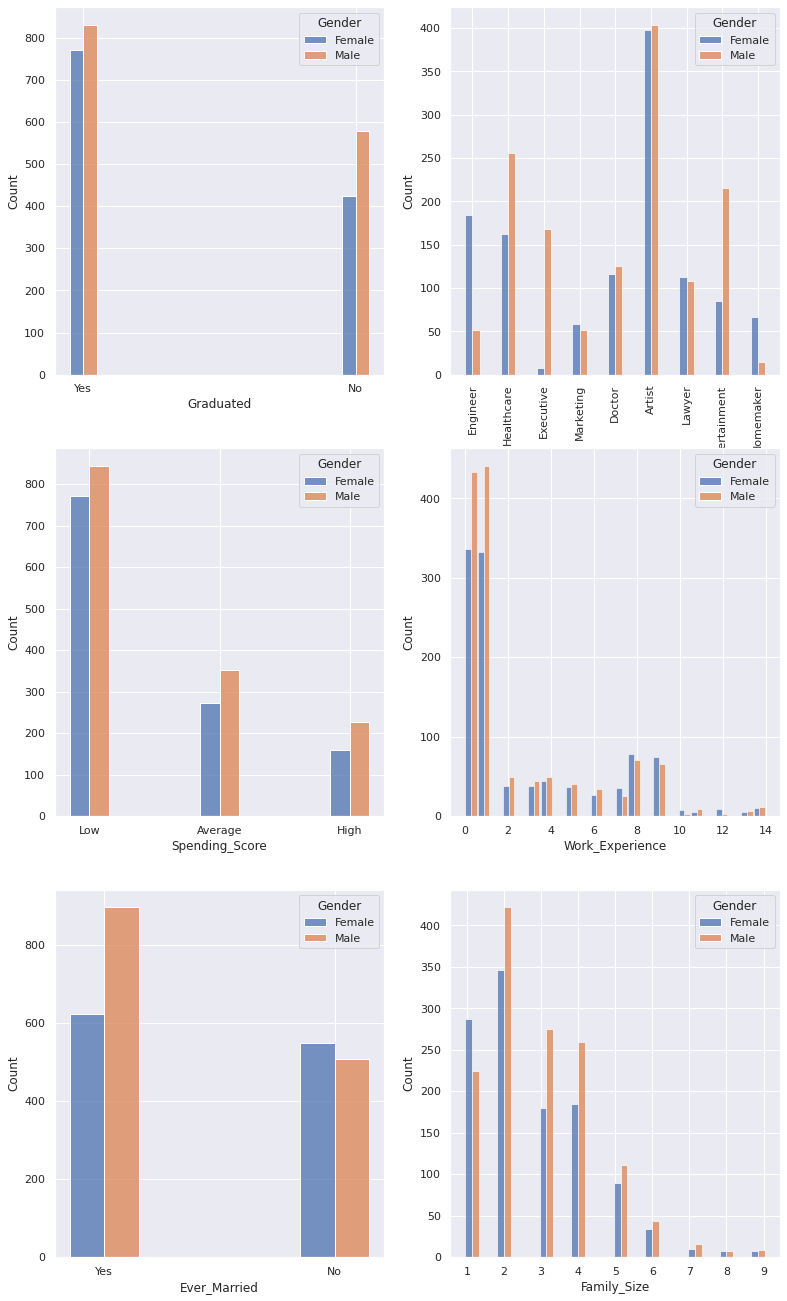

In [201]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(13, 23))

z = sns.histplot(df, x='Profession',hue = 'Gender',multiple="dodge", ax = axs[0,1], shrink = 0.4)
z.tick_params(axis='x', rotation=90)

sns.histplot(df, x='Graduated',hue = 'Gender',multiple="dodge", ax = axs[0,0], shrink = 0.1)
sns.histplot(df, x='Spending_Score', hue = 'Gender',multiple="dodge", ax = axs[1,0], shrink = 0.3)
sns.histplot(df, x='Work_Experience', hue = 'Gender',multiple="dodge", ax = axs[1,1], shrink = 0.9)
sns.histplot(df, x='Ever_Married', hue = 'Gender',multiple="dodge", ax = axs[2,0], shrink = 0.3)
sns.histplot(df, x='Family_Size', hue = 'Gender',multiple="dodge", ax = axs[2,1], shrink = 1.3)

<AxesSubplot:xlabel='Family_Size', ylabel='Count'>

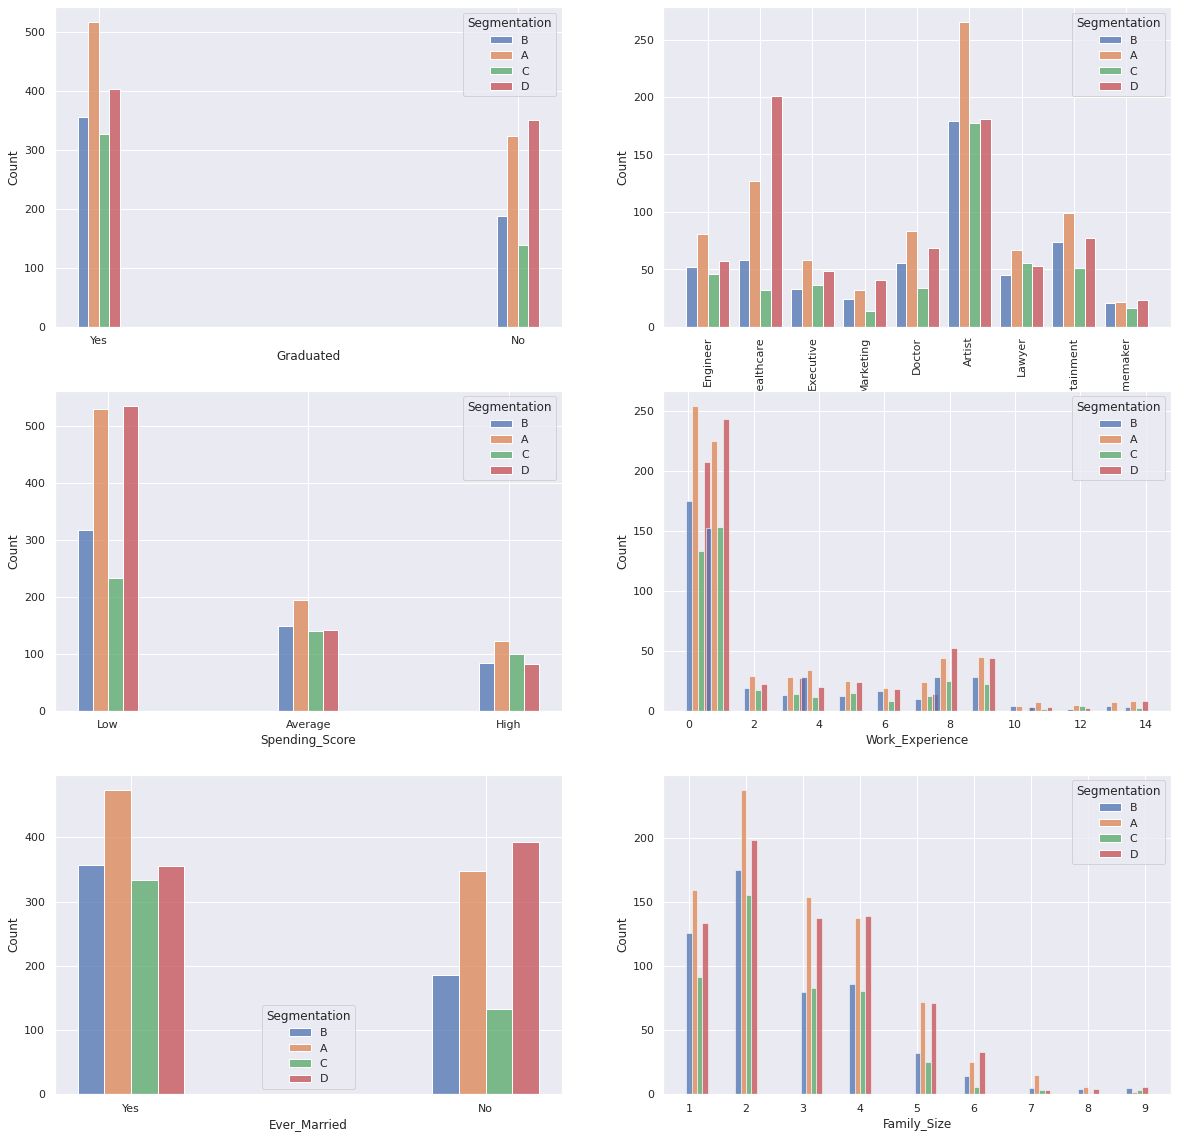

In [202]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

z = sns.histplot(df, x='Profession',hue = 'Segmentation',multiple="dodge", ax = axs[0,1], shrink = 0.82)
z.tick_params(axis='x', rotation=90)

sns.histplot(df, x='Graduated',hue = 'Segmentation',multiple="dodge", ax = axs[0,0], shrink = 0.1)
sns.histplot(df, x='Spending_Score', hue = 'Segmentation',multiple="dodge", ax = axs[1,0], shrink = 0.3)
sns.histplot(df, x='Work_Experience',  hue = 'Segmentation',multiple="dodge", ax = axs[1,1], shrink = 1.21)
sns.histplot(df, x='Ever_Married', hue = 'Segmentation',multiple="dodge", ax = axs[2,0], shrink = 0.3)
sns.histplot(df, x='Family_Size', hue = 'Segmentation',multiple="dodge", ax = axs[2,1], shrink = 1.3)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

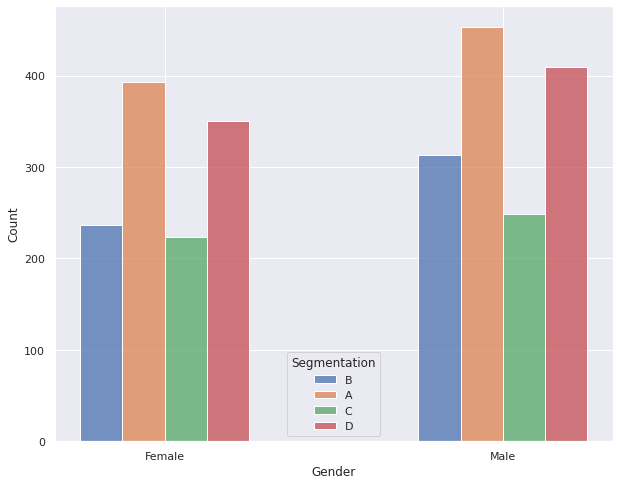

In [203]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(df, x='Gender', hue = 'Segmentation',multiple="dodge", shrink = 0.5)


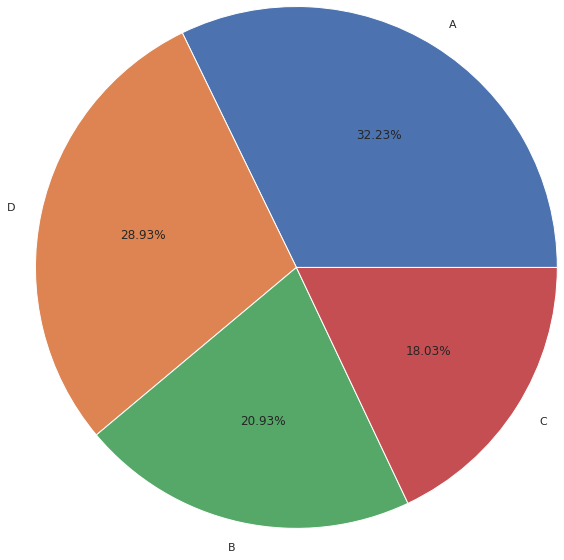

In [204]:
segm_percentage = df['Segmentation'].value_counts().plot.pie(autopct = '%1.1f3%%', radius = 1.5)

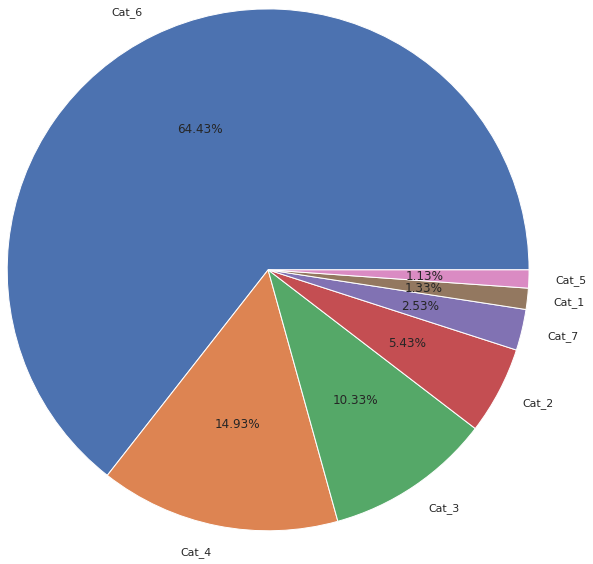

In [205]:
var_percentage = df['Var_1'].value_counts().plot.pie(autopct = '%1.1f3%%', radius = 1.5)

<AxesSubplot:xlabel='Age'>

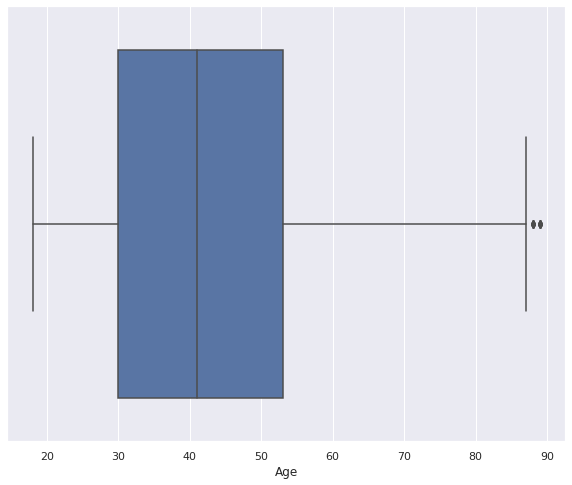

In [206]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Family_Size'>

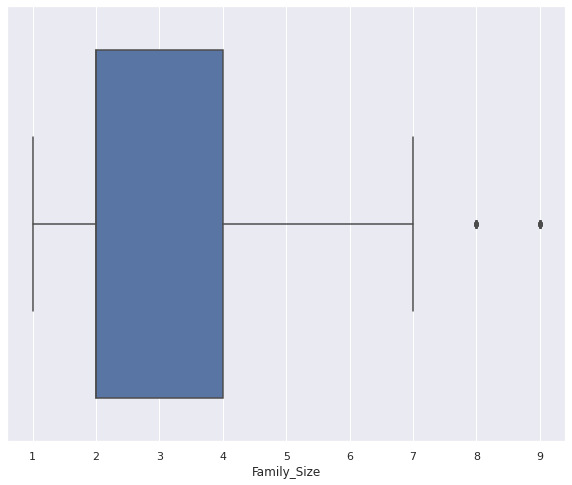

In [207]:
sns.boxplot(df["Family_Size"])

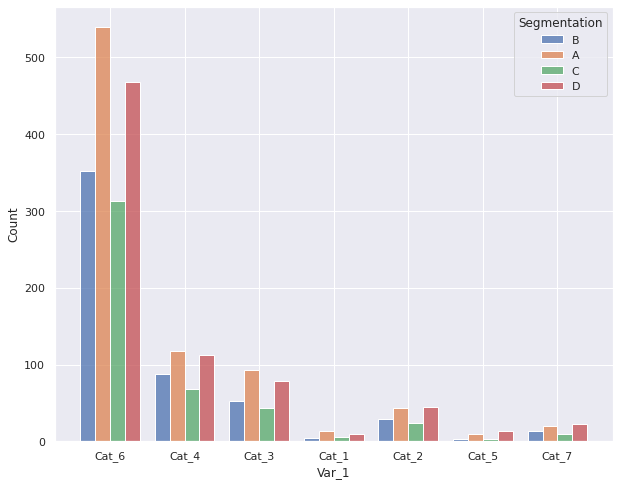

In [208]:
var_seg = sns.histplot(df, x='Var_1', hue = 'Segmentation',multiple="dodge", shrink = 0.8)

In [209]:
df = df.dropna()
test = test.dropna()

In [210]:
df.duplicated().sum()

20

In [211]:
test.duplicated().sum()

0

In [212]:
df = df.drop_duplicates()


In [213]:
df_objects = [col for col in df if df[col].dtypes == 'object']

In [214]:
label_encoder = LabelEncoder()
df[df_objects] = df[df_objects].apply(label_encoder.fit_transform)

In [215]:
df.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000
mean,0.547329,0.590909,43.477038,0.625586,2.733365,2.565604,1.371603,2.839269,4.162137,1.437207
std,0.497872,0.491781,16.716892,0.484085,2.564981,3.353547,0.848683,1.570931,1.389449,1.213127
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,1.000000,1.000000,41.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.000000,1.000000
75%,1.000000,1.000000,52.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,6.000000,3.000000


In [216]:
X = df.drop(['Segmentation', 'Graduated', 'Spending_Score', 'Family_Size', ], axis = 1)
y = df['Segmentation']

In [217]:
std  = MinMaxScaler()
X = pd.DataFrame(std.fit_transform(X) , columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 40)

1. Type A&D segmentation is not the highest of all types, though types B&C are less by only 10%.
2. The age between 30 and 55 is frequent the dataset.
3. Family members of 4 and 5 are more frequent in the dataset.
4. Cat_6 has a percentage of 60% above every other type, then comes Cat_3 & Cat_4 of nearly 10% of percentage.
5. Gender has no significant importance over most of the dataset features.
6. Spending score gets higher starting from the age 35.
7. The every var_1 type gets higher from the age of 35, but no direct correlation since this has the highest correlation of the data.
8. Married individuals with no kids are most likely to get sementation types A & D.
9. No correlation was found between the types of segment and people with high spending scores, unlike people with low spending scores,most likely they get type A & D segmentation, but again this is a weak correlation, since A & D are the most frequent ones.
10. Graduated people are most likely to get a segmentation.
11. Health-care profession is more likely to get the D type segmentation.
12. The higher the family size gets, the lower segmentations they get.

# Classification models comparison

In [218]:
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.33      0.53      0.41       148
           1       0.21      0.04      0.06        80
           2       0.32      0.10      0.16        86
           3       0.36      0.47      0.41       113

    accuracy                           0.34       427
   macro avg       0.31      0.29      0.26       427
weighted avg       0.32      0.34      0.29       427

[[79  3 14 52]
 [47  3  3 27]
 [59  4  9 14]
 [54  4  2 53]]
LR accuracy: 33.72%


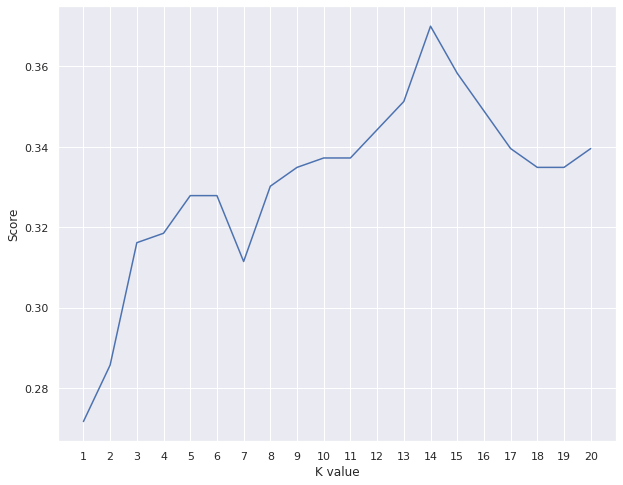

KNN best accuracy: 37.00%


In [219]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [220]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.33      0.68      0.45       148
           1       0.00      0.00      0.00        80
           2       0.75      0.03      0.07        86
           3       0.39      0.42      0.41       113

    accuracy                           0.35       427
   macro avg       0.37      0.28      0.23       427
weighted avg       0.37      0.35      0.28       427

[[101   0   0  47]
 [ 63   0   1  16]
 [ 74   0   3   9]
 [ 66   0   0  47]]
SVC accuracy: 35.36%


In [221]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.34      0.59      0.43       148
           1       0.67      0.03      0.05        80
           2       0.00      0.00      0.00        86
           3       0.38      0.57      0.45       113

    accuracy                           0.36       427
   macro avg       0.35      0.29      0.23       427
weighted avg       0.34      0.36      0.28       427

[[87  0  2 59]
 [54  2  0 24]
 [64  0  0 22]
 [48  1  0 64]]
Categorical Naive Bayes accuracy: 35.83%


In [222]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.34      0.41      0.37       148
           1       0.34      0.14      0.20        80
           2       0.33      0.36      0.34        86
           3       0.38      0.41      0.39       113

    accuracy                           0.35       427
   macro avg       0.35      0.33      0.33       427
weighted avg       0.35      0.35      0.34       427

[[61  9 30 48]
 [29 11 20 20]
 [41  6 31  8]
 [47  6 14 46]]
Gaussian Naive Bayes accuracy: 34.89%


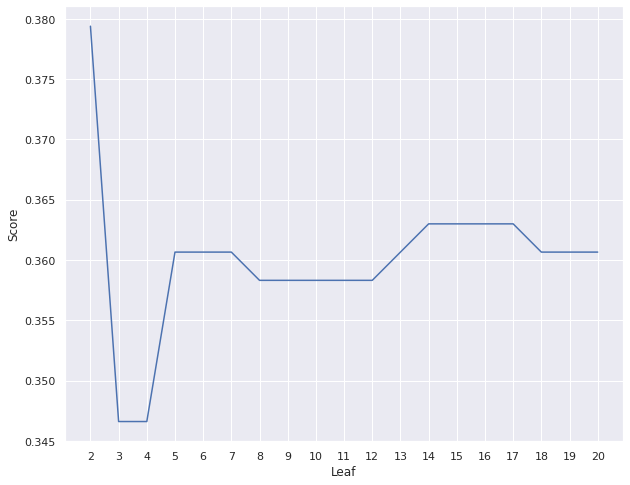

Decision Tree Accuracy: 37.94%


In [223]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

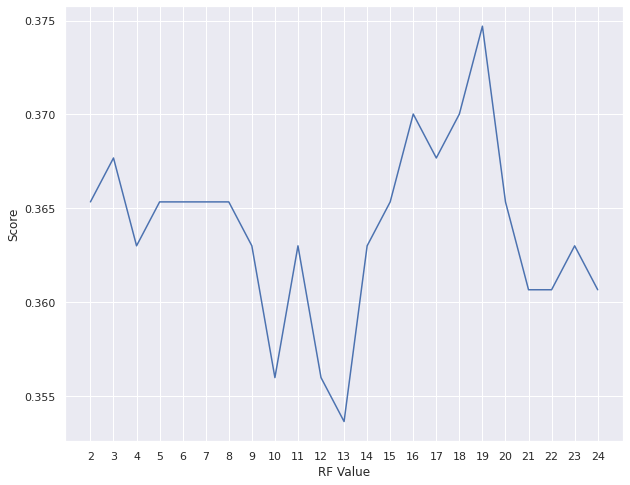

Random Forest Accuracy:  37.47%


In [224]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [225]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False).style.hide_index()


Model,Accuracy
Decision Tree,37.939110
Random Forest,37.470726
K Neighbors,37.002342
Categorical NB,35.831382
SVM,35.362998
Gaussian NB,34.894614
Logistic Regression,33.723653
